In [1]:
import pandas as pd
import FinanceDataReader as fdr
# pypfopt pkg is to optimize a PF of stocks.
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.cla import CLA
from pypfopt import plotting, risk_models, expected_returns
from pypfopt.plotting import plot_weights

In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
pf = ['AAPL', 'TSLA', 'BRK-A']
fed_fund_rate = 0.045
prices = pd.DataFrame()
for ticker in pf:
    prices[ticker] = fdr.DataReader(ticker, '2012-03-05', '2022-03-05')['Adj Close']

In [4]:
# annualized mean return
mu = expected_returns.mean_historical_return(prices)

# sample_cov - calculate covariance by prices and returns annualized results, no need to multiply trading days(ex-252) - already included the trading days in the function
sigma = risk_models.sample_cov(prices)
mu, sigma

(AAPL     0.259366
 TSLA     0.620440
 BRK-A    0.151725
 dtype: float64,
            AAPL      TSLA     BRK-A
 AAPL   0.080842  0.052054  0.021694
 TSLA   0.052054  0.311551  0.023406
 BRK-A  0.021694  0.023406  0.031393)

In [5]:
# weight_bounds=(-1, 1) : including short position
# weight_bounds=(0, 1) : each asset can be 0~100% portion of total PF
efficient_frontier = EfficientFrontier(mu, sigma, weight_bounds=(0, 1))

/Users/oliverjoo/Dev/Anaconda/anaconda3/envs/tf_finance/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


<Axes: xlabel='Volatility', ylabel='Return'>

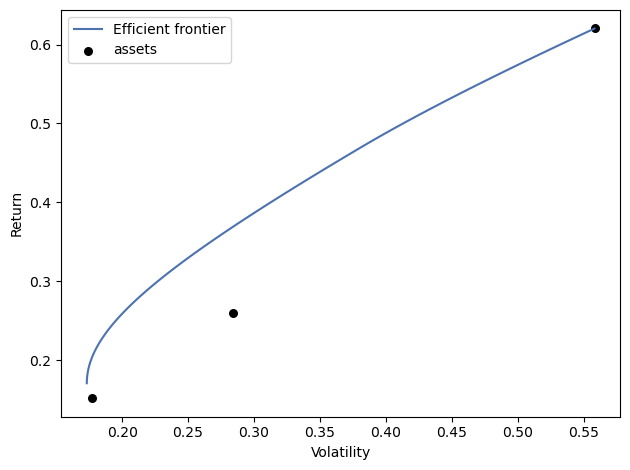

In [6]:
# to see plotting.plot_efficient_frontier, min_volatility or max_sharp shouldn't run,  and vise versa.
plotting.plot_efficient_frontier(efficient_frontier, show_assets=True)

In [7]:
# to minimize the volatility of PF
# min_vol_weights = efficient_frontier.min_volatility()
# print(f'Each portion of PF to minimize the PF volatility : {min_vol_weights}')

# to maximie risk-adjusted return
efficient_frontier = EfficientFrontier(mu, sigma, weight_bounds=(0, 1))
max_sharpe_ratio_weights  = efficient_frontier.max_sharpe(risk_free_rate=fed_fund_rate)
print(f'Each portion of PF to maximize the PF sharp ratio: {max_sharpe_ratio_weights}')

Each portion of PF to maximize the PF sharp ratio: OrderedDict([('AAPL', 0.3109996477966554), ('TSLA', 0.3643795017325426), ('BRK-A', 0.3246208504708018)])


Expected annual return: 35.6%
Annual volatility: 27.2%
Sharpe Ratio: 1.14


<Axes: xlabel='Weight'>

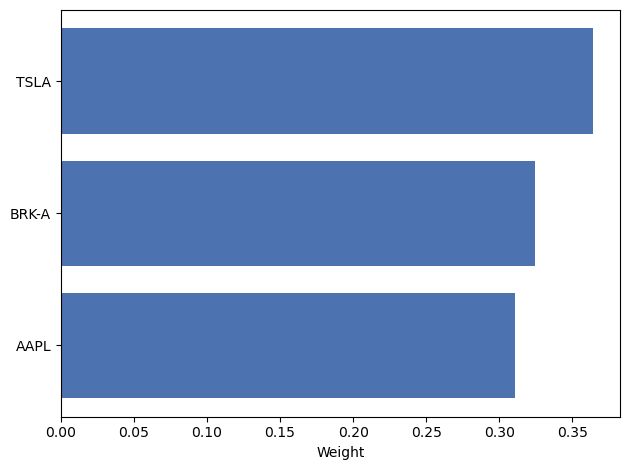

In [8]:
efficient_frontier.portfolio_performance(verbose=True, risk_free_rate=fed_fund_rate)
plot_weights(max_sharpe_ratio_weights)

<Axes: xlabel='Volatility', ylabel='Return'>

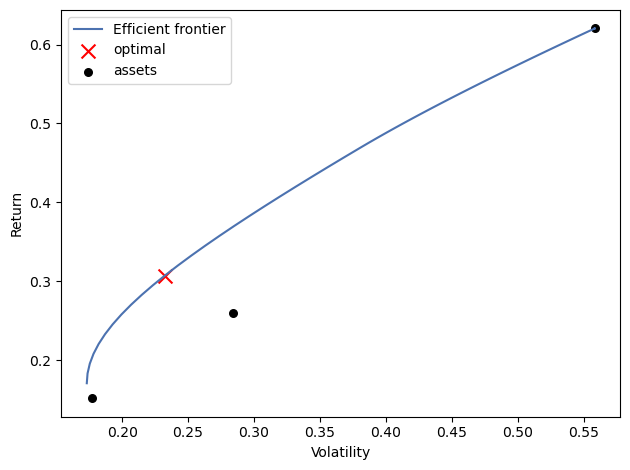

In [9]:
# CLA(Critical Line Algorithm): optimization solution to find the optimal PF on the curve
# only one algorithm specifically designed for inequality-constrained PF optimization
cla = CLA(mu, sigma)
plotting.plot_efficient_frontier(cla)